In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score  

In [70]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function
def cross_entropy_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Compute gradient
def compute_gradient(x, y, y_pred):
    n = y.shape[0]
    return np.dot(x.T, (y_pred - y)) / n

In [71]:
# Plot sigmoid curve
def plot_sigmoid():
    z = np.linspace(-10, 10, 200)
    sig = sigmoid(z)
    plt.figure(figsize=(8, 6))
    plt.plot(z, sig, label='Sigmoid Function')
    plt.title('Sigmoid Curve')
    plt.xlabel('z')
    plt.ylabel('Sigmoid(z)')
    plt.grid()
    plt.legend()
    plt.show()

In [72]:
# Plot decision boundary
def plot_decision_boundary(x, y, weights, loss, iteration):
    plt.figure(figsize=(8, 6))
    x_min, x_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    y_min, y_max = x[:, 2].min() - 0.1, x[:, 2].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap="RdBu")
    plt.scatter(x[:, 1], x[:, 2], c=y, edgecolors="k", cmap="RdBu")
    plt.title(f"Iteration {iteration}, Loss: {loss:.4f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar()
    plt.show()
    
# Plot loss curve
def plot_loss_curve(loss):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(loss)), loss, label='Loss Curve')
    plt.title('Loss Curve During Training')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    plt.show()    

In [73]:
# Logistic regression model
def logistic_regression(x, y, learning_rate=0.01, num_iterations=100):
    # Add intercept term to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    
    # Initialize the weights
    weights = np.zeros(x.shape[1])

    # Gradient descent
    for i in range(num_iterations):
        # Forward pass
        z = np.dot(x, weights)
        y_pred = sigmoid(z)

        # Backward pass
        loss = cross_entropy_loss(y, y_pred)
        gradient = compute_gradient(x, y, y_pred)

        # Weight update
        weights -= learning_rate * gradient

        if i % 20 == 0:
            plot_decision_boundary(x, y, weights, loss, i)
            
            print(f"Iteration {i}: Weights={weights}, Loss={loss}")


    
    return weights

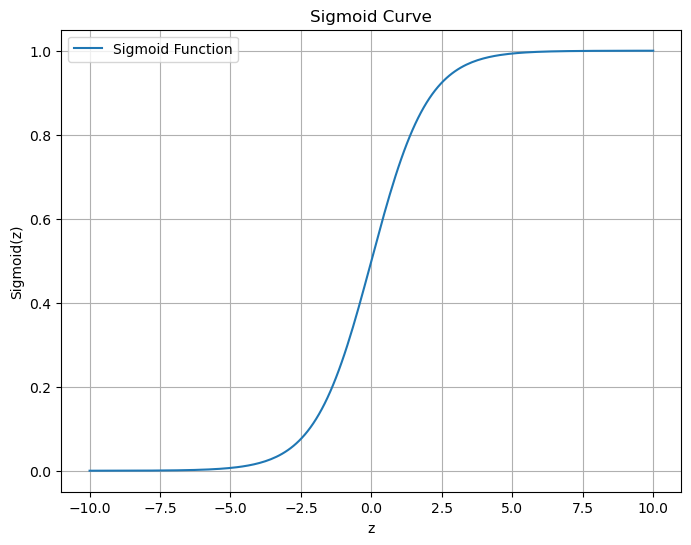

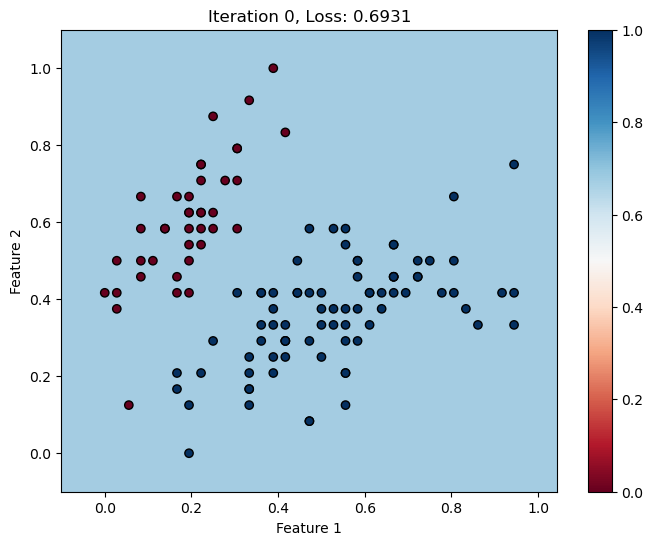

Iteration 0: Weights=[0.00166667 0.00145718 0.00019444], Loss=0.6931471805599453


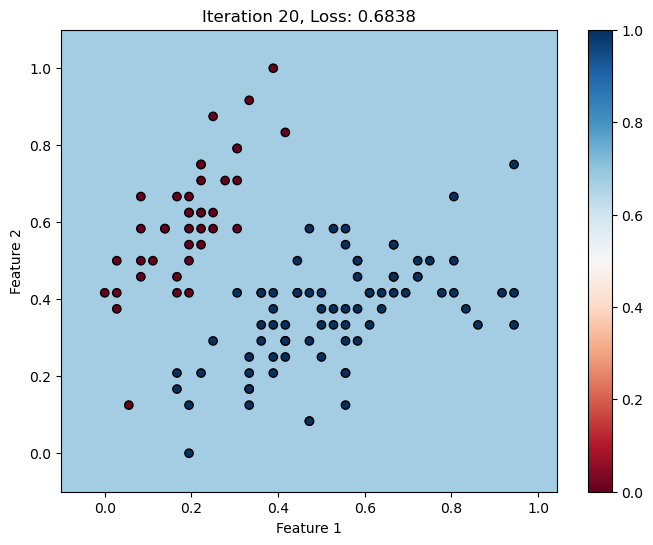

Iteration 20: Weights=[0.03378604 0.03005295 0.00354651], Loss=0.6838011564493744


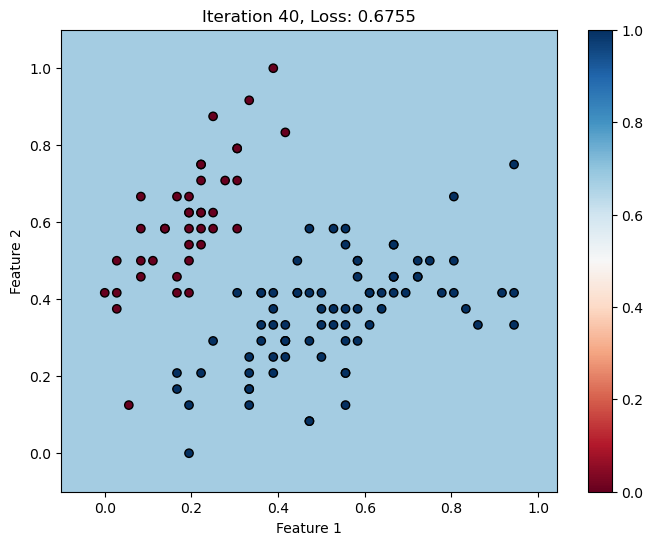

Iteration 40: Weights=[0.06370076 0.0576523  0.0059247 ], Loss=0.6754523851671622


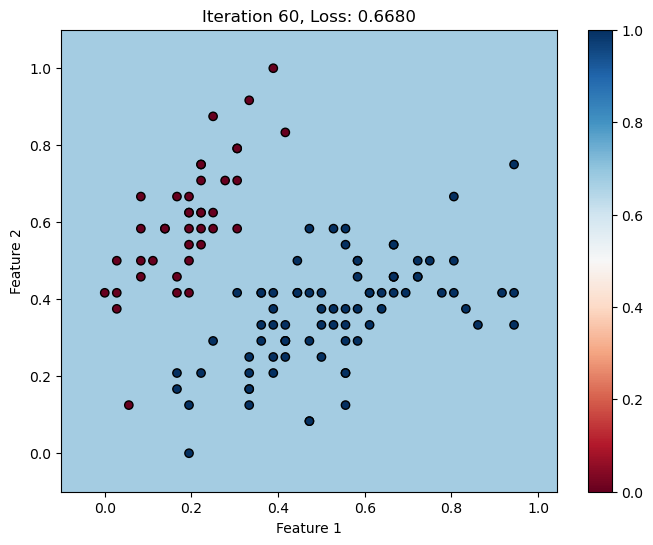

Iteration 60: Weights=[0.09156151 0.08432098 0.00739708], Loss=0.6679717830450846


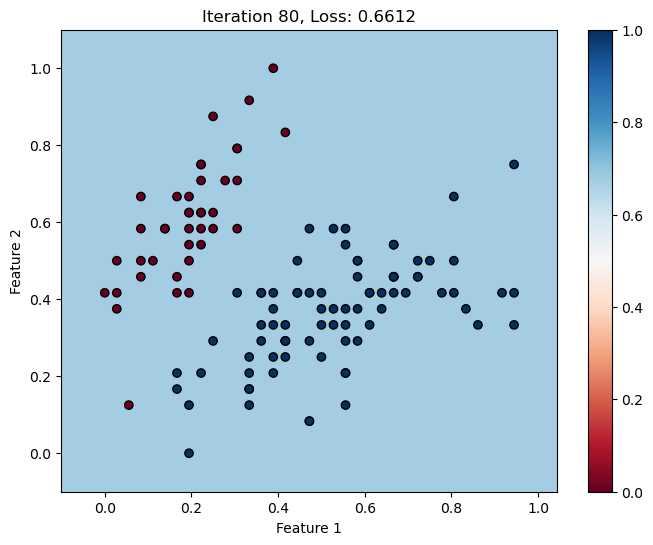

Iteration 80: Weights=[0.11750994 0.11012095 0.0080276 ], Loss=0.6612466717948304
MSE: 0.2301
R2 Score: -0.5000


In [74]:
# Load Iris dataset
iris = load_iris()
x = iris.data[:, :2]  # Use only the first two features
y = (iris.target != 0).astype(int)  # Binary classification (class 0 vs others)

# Normalize features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train logistic regression model
plot_sigmoid()
weights = logistic_regression(x_train, y_train, learning_rate=0.01, num_iterations=100)

# Evaluate model
x_test_augmented = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
y_pred = sigmoid(np.dot(x_test_augmented, weights))
y_pred_binary = (y_pred >= 0.5).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_binary)

print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
